In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.backend as keras_backend

from MAML import MAMLmodel, normalize, forward_func

from SinusoidDs import meta_sinusoid_ds, SinusoidGenerator, SineModel, eval_sinewave_for_test
from utils import plot

# Other dependencies
import random
import sys
import timeit

import numpy as np
import matplotlib.pyplot as plt
import os
import logging

dtype="float32"
tf.keras.backend.set_floatx(dtype)
print('Python version: ', sys.version)
print('TensorFlow version: ', tf.__version__)
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('GPU found at: {}'.format(device_name))
plt.style.use('seaborn')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # FATAL
logging.getLogger('tensorflow').setLevel(logging.FATAL)
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)


Python version:  3.6.10 |Anaconda, Inc.| (default, May  7 2020, 19:46:08) [MSC v.1916 64 bit (AMD64)]
TensorFlow version:  2.3.1
GPU found at: /device:GPU:0
1 Physical GPUs, 1 Logical GPUs


In [ ]:
fshot = 10
meta_batch_size = 16
ds =meta_sinusoid_ds(fshot, meta_batch_size)

In [6]:
inp = next(iter(ds))

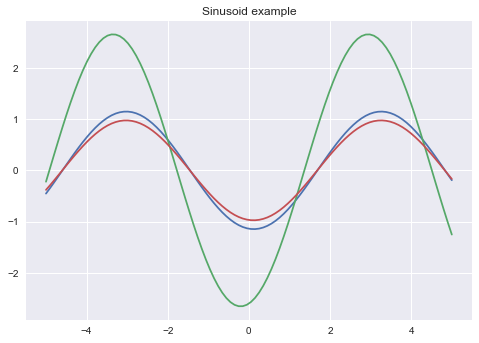

In [ ]:

plt.figure()
for _ in range(3):
    plt.title('Sinusoid example')
    plot(SinusoidGenerator(K=100).equally_spaced_samples())
plt.show()


In [10]:
inner_update = 5

In [14]:
maml_model = SineModel()

In [19]:
meta_batch_size=16

In [ ]:
meta_trainer = MAMLmodel(maml_model, inner_update, meta_batch_size)

In [ ]:
meta_trainer.meta_training(ds)


Update 1 : Outer loss: 3.5016610622406006   time: 4.1561366
Update 2 : Outer loss: 5.983155250549316   time: 0.05094870000000018
Update 3 : Outer loss: 3.6726503372192383   time: 0.052399000000000306
Update 4 : Outer loss: 2.456535816192627   time: 0.054579800000000844
Update 5 : Outer loss: 2.9885175228118896   time: 0.05531820000000032
Update 6 : Outer loss: 5.3564372062683105   time: 0.05455409999999983
Update 7 : Outer loss: 3.774061918258667   time: 0.0533323999999995
Update 8 : Outer loss: 3.8331780433654785   time: 0.05153989999999986
Update 9 : Outer loss: 3.33402156829834   time: 0.051326599999999445
Update 10 : Outer loss: 3.5420145988464355   time: 0.05490740000000027
Update 11 : Outer loss: 3.818887233734131   time: 0.04823339999999998
Update 12 : Outer loss: 5.697635650634766   time: 0.054534100000000585
Update 13 : Outer loss: 2.634036064147949   time: 0.05413959999999918
Update 14 : Outer loss: 4.265791416168213   time: 0.05432400000000026
Update 15 : Outer loss: 3.70043

Update 118 : Outer loss: 1.9088495969772339   time: 0.03562040000000266
Update 119 : Outer loss: 3.4445137977600098   time: 0.04093699999999956
Update 120 : Outer loss: 1.9745773077011108   time: 0.18571509999999947
Update 121 : Outer loss: 3.3950555324554443   time: 0.056180899999997536
Update 122 : Outer loss: 2.995500326156616   time: 0.05413430000000119
Update 123 : Outer loss: 3.1085004806518555   time: 0.0521710000000013
Update 124 : Outer loss: 4.127687931060791   time: 0.05434269999999941
Update 125 : Outer loss: 4.042252540588379   time: 0.05360799999999699
Update 126 : Outer loss: 1.3532010316848755   time: 0.053303100000000825
Update 127 : Outer loss: 2.422025680541992   time: 0.05083500000000285
Update 128 : Outer loss: 3.5513482093811035   time: 0.04990959999999944
Update 129 : Outer loss: 2.163975715637207   time: 0.053698600000000596
Update 130 : Outer loss: 2.9883828163146973   time: 0.05084280000000163
Update 131 : Outer loss: 2.1814401149749756   time: 0.0525822999999

Update 235 : Outer loss: 2.8246333599090576   time: 0.03616880000000222
Update 236 : Outer loss: 2.0752737522125244   time: 0.0366111999999994
Update 237 : Outer loss: 1.5143229961395264   time: 0.03841520000000287
Update 238 : Outer loss: 1.7210462093353271   time: 0.03423490000000129
Update 239 : Outer loss: 3.2036776542663574   time: 0.034752699999998526
Update 240 : Outer loss: 2.2164697647094727   time: 0.035026099999999616
Update 241 : Outer loss: 2.367589235305786   time: 0.04401710000000136
Update 242 : Outer loss: 1.858572244644165   time: 0.03645460000000256
Update 243 : Outer loss: 2.0472729206085205   time: 0.03427210000000258
Update 244 : Outer loss: 2.769179344177246   time: 0.03546090000000035
Update 245 : Outer loss: 2.9920907020568848   time: 0.038673299999999244
Update 246 : Outer loss: 2.436290740966797   time: 0.03564590000000223
Update 247 : Outer loss: 2.3033363819122314   time: 0.03578849999999889
Update 248 : Outer loss: 2.553532600402832   time: 0.0362414999999

Update 354 : Outer loss: 1.187285304069519   time: 0.035947400000001295
Update 355 : Outer loss: 1.2684764862060547   time: 0.03458699999999837
Update 356 : Outer loss: 1.7347514629364014   time: 0.036485299999998944
Update 357 : Outer loss: 1.750233769416809   time: 0.0346232999999998
Update 358 : Outer loss: 1.8546011447906494   time: 0.034877200000000386
Update 359 : Outer loss: 2.507054328918457   time: 0.0355150999999978
Update 360 : Outer loss: 1.5932797193527222   time: 0.03912820000000039
Update 361 : Outer loss: 1.724988341331482   time: 0.035130900000002185
Update 362 : Outer loss: 3.1585533618927   time: 0.035396199999997435
Update 363 : Outer loss: 2.698789358139038   time: 0.04131350000000111
Update 364 : Outer loss: 1.1159703731536865   time: 0.04428659999999951
Update 365 : Outer loss: 1.6075069904327393   time: 0.03666859999999872
Update 366 : Outer loss: 1.2076458930969238   time: 0.03679969999999955
Update 367 : Outer loss: 1.7643535137176514   time: 0.037015499999998

Update 469 : Outer loss: 0.9263381361961365   time: 0.035570599999999786
Update 470 : Outer loss: 1.3200361728668213   time: 0.03862519999999847
Update 471 : Outer loss: 1.9030482769012451   time: 0.035153700000002175
Update 472 : Outer loss: 1.5287134647369385   time: 0.03754579999999663
Update 473 : Outer loss: 1.1954827308654785   time: 0.03597469999999703
Update 474 : Outer loss: 1.9859154224395752   time: 0.03550639999999561
Update 475 : Outer loss: 2.1137876510620117   time: 0.03677989999999909
Update 476 : Outer loss: 1.00546395778656   time: 0.03473939999999942
Update 477 : Outer loss: 1.6376633644104004   time: 0.034788700000000006
Update 478 : Outer loss: 0.945817232131958   time: 0.03488229999999959
Update 479 : Outer loss: 2.570547580718994   time: 0.0349946999999986
Update 480 : Outer loss: 1.3392106294631958   time: 0.036889700000003245
Update 481 : Outer loss: 1.3741276264190674   time: 0.03540749999999804
Update 482 : Outer loss: 1.6283142566680908   time: 0.03749429999

Update 585 : Outer loss: 1.2368996143341064   time: 0.03577070000000049
Update 586 : Outer loss: 1.0307176113128662   time: 0.03563919999999854
Update 587 : Outer loss: 1.5920071601867676   time: 0.03567999999999927
Update 588 : Outer loss: 0.920622706413269   time: 0.03562890000000607
Update 589 : Outer loss: 1.043967843055725   time: 0.03559320000000099
Update 590 : Outer loss: 1.1999239921569824   time: 0.04279910000000342
Update 591 : Outer loss: 0.8155694007873535   time: 0.03949639999999732
Update 592 : Outer loss: 0.5042181015014648   time: 0.04036959999999823
Update 593 : Outer loss: 1.2899442911148071   time: 0.03517610000000104
Update 594 : Outer loss: 1.204063057899475   time: 0.039634800000001746
Update 595 : Outer loss: 0.6216312646865845   time: 0.03549189999999669
Update 596 : Outer loss: 1.257174015045166   time: 0.036076999999998804
Update 597 : Outer loss: 1.362589716911316   time: 0.034983199999999215
Update 598 : Outer loss: 1.1895818710327148   time: 0.045102599999

Update 704 : Outer loss: 0.6141288876533508   time: 0.03811100000000067
Update 705 : Outer loss: 0.5679963827133179   time: 0.03579409999999683
Update 706 : Outer loss: 0.9643441438674927   time: 0.03561220000000276
Update 707 : Outer loss: 1.241070032119751   time: 0.03570659999999748
Update 708 : Outer loss: 1.0604722499847412   time: 0.040984100000002854
Update 709 : Outer loss: 1.144282579421997   time: 0.03541299999999836
Update 710 : Outer loss: 1.0271058082580566   time: 0.03838700000000017
Update 711 : Outer loss: 0.9276732206344604   time: 0.036823900000001686
Update 712 : Outer loss: 1.0660418272018433   time: 0.03573169999999948
Update 713 : Outer loss: 1.5928138494491577   time: 0.03542730000000205
Update 714 : Outer loss: 1.110062599182129   time: 0.035654800000003206
Update 715 : Outer loss: 1.296473503112793   time: 0.03562660000000051
Update 716 : Outer loss: 1.042434811592102   time: 0.036160800000004656
Update 717 : Outer loss: 1.3944886922836304   time: 0.03510479999

Update 823 : Outer loss: 0.7780790328979492   time: 0.03690280000000001
Update 824 : Outer loss: 0.7302742004394531   time: 0.03449770000000285
Update 825 : Outer loss: 0.4400920271873474   time: 0.03686919999999816
Update 826 : Outer loss: 1.3069597482681274   time: 0.03470980000000168
Update 827 : Outer loss: 0.5722765922546387   time: 0.03487769999999557
Update 828 : Outer loss: 0.4520701467990875   time: 0.035633000000004245
Update 829 : Outer loss: 0.9618698954582214   time: 0.035948999999995124
Update 830 : Outer loss: 1.0789037942886353   time: 0.037140999999998314
Update 831 : Outer loss: 0.800734281539917   time: 0.035843399999997416
Update 832 : Outer loss: 0.5630866885185242   time: 0.03502110000000158
Update 833 : Outer loss: 0.761006236076355   time: 0.036383300000004226
Update 834 : Outer loss: 0.4259051978588104   time: 0.03639129999999824
Update 835 : Outer loss: 0.7820242047309875   time: 0.035078599999998517
Update 836 : Outer loss: 1.1306118965148926   time: 0.041203

Update 937 : Outer loss: 0.6295795440673828   time: 0.03565799999999797
Update 938 : Outer loss: 0.5498542189598083   time: 0.03562029999999794
Update 939 : Outer loss: 0.5909689664840698   time: 0.03582730000000112
Update 940 : Outer loss: 0.7919106483459473   time: 0.03577380000000119
Update 941 : Outer loss: 0.6895763278007507   time: 0.034359699999995996
Update 942 : Outer loss: 0.39155709743499756   time: 0.03444359999999591
Update 943 : Outer loss: 0.47848641872406006   time: 0.03657179999999727
Update 944 : Outer loss: 0.7286255955696106   time: 0.037201200000005485
Update 945 : Outer loss: 0.3469473123550415   time: 0.03794320000000084
Update 946 : Outer loss: 0.40960121154785156   time: 0.03727460000000349
Update 947 : Outer loss: 0.7071995735168457   time: 0.03752249999999435
Update 948 : Outer loss: 0.7512404322624207   time: 0.03462069999999784
Update 949 : Outer loss: 0.5850723385810852   time: 0.03572059999999766
Update 950 : Outer loss: 0.2788446843624115   time: 0.03970

Update 1055 : Outer loss: 0.3928886353969574   time: 0.04168500000000108
Update 1056 : Outer loss: 0.8088128566741943   time: 0.03454419999999914
Update 1057 : Outer loss: 0.415895015001297   time: 0.037117000000002065
Update 1058 : Outer loss: 0.3553473651409149   time: 0.03495850000000189
Update 1059 : Outer loss: 0.8282656669616699   time: 0.03576400000000035
Update 1060 : Outer loss: 0.30796903371810913   time: 0.03655830000000293
Update 1061 : Outer loss: 0.2400706708431244   time: 0.03504839999999376
Update 1062 : Outer loss: 0.37004125118255615   time: 0.038367899999997235
Update 1063 : Outer loss: 0.49773192405700684   time: 0.035039999999995075
Update 1064 : Outer loss: 0.48439717292785645   time: 0.03547879999999992
Update 1065 : Outer loss: 0.6072909832000732   time: 0.036256700000002695
Update 1066 : Outer loss: 0.4023621082305908   time: 0.034990800000002764
Update 1067 : Outer loss: 0.7354679703712463   time: 0.03495709999999974
Update 1068 : Outer loss: 0.215470746159553

Update 1172 : Outer loss: 0.6470531225204468   time: 0.03573080000000317
Update 1173 : Outer loss: 0.48666825890541077   time: 0.03844840000000005
Update 1174 : Outer loss: 0.5238326191902161   time: 0.035368400000002964
Update 1175 : Outer loss: 0.5611284971237183   time: 0.03675959999999634
Update 1176 : Outer loss: 0.7724494934082031   time: 0.0346422000000004
Update 1177 : Outer loss: 0.4910615086555481   time: 0.03712870000000379
Update 1178 : Outer loss: 0.20848487317562103   time: 0.03532669999999882
Update 1179 : Outer loss: 0.4237236976623535   time: 0.034671699999996974
Update 1180 : Outer loss: 0.3761104345321655   time: 0.03443680000000171
Update 1181 : Outer loss: 0.5787610411643982   time: 0.03568039999999684
Update 1182 : Outer loss: 0.49808818101882935   time: 0.034364000000003614
Update 1183 : Outer loss: 0.654712438583374   time: 0.03996959999999916
Update 1184 : Outer loss: 0.7096782922744751   time: 0.03550060000000599
Update 1185 : Outer loss: 0.45946910977363586  

Update 1288 : Outer loss: 0.35537993907928467   time: 0.0365460000000013
Update 1289 : Outer loss: 0.21908482909202576   time: 0.03525480000000414
Update 1290 : Outer loss: 0.4077135920524597   time: 0.03589060000000188
Update 1291 : Outer loss: 0.21186614036560059   time: 0.03523459999999545
Update 1292 : Outer loss: 0.3195593059062958   time: 0.03734619999999467
Update 1293 : Outer loss: 0.30686336755752563   time: 0.03465709999999689
Update 1294 : Outer loss: 0.44934043288230896   time: 0.03646429999999867
Update 1295 : Outer loss: 0.21580323576927185   time: 0.04384449999999873
Update 1296 : Outer loss: 0.2739925980567932   time: 0.03473790000000321
Update 1297 : Outer loss: 0.2520352602005005   time: 0.038871800000002565
Update 1298 : Outer loss: 0.26082420349121094   time: 0.03565580000000068
Update 1299 : Outer loss: 0.36893653869628906   time: 0.03566459999999694
Update 1300 : Outer loss: 0.5305852890014648   time: 0.035304400000001124
Update 1301 : Outer loss: 0.26594075560569

Update 1403 : Outer loss: 0.23888438940048218   time: 0.036336500000004435
Update 1404 : Outer loss: 0.39882519841194153   time: 0.036558900000002836
Update 1405 : Outer loss: 0.2711164951324463   time: 0.03582620000000247
Update 1406 : Outer loss: 0.2838229238986969   time: 0.036224099999998316
Update 1407 : Outer loss: 0.4032621681690216   time: 0.03885549999999682
Update 1408 : Outer loss: 0.4446893334388733   time: 0.03507820000000095
Update 1409 : Outer loss: 0.4091758131980896   time: 0.03842369999999562
Update 1410 : Outer loss: 0.27145835757255554   time: 0.03529809999999145
Update 1411 : Outer loss: 0.2875570058822632   time: 0.03528230000000576
Update 1412 : Outer loss: 0.3313596248626709   time: 0.03595380000000148
Update 1413 : Outer loss: 0.38156676292419434   time: 0.03602169999999205
Update 1414 : Outer loss: 0.29882562160491943   time: 0.046551399999998466
Update 1415 : Outer loss: 0.28135544061660767   time: 0.03641829999999402
Update 1416 : Outer loss: 0.3524545133113

Update 1519 : Outer loss: 0.19376406073570251   time: 0.037214300000002254
Update 1520 : Outer loss: 0.22203876078128815   time: 0.034847299999995585
Update 1521 : Outer loss: 0.21719911694526672   time: 0.03497140000000343
Update 1522 : Outer loss: 0.20189930498600006   time: 0.035935000000009154
Update 1523 : Outer loss: 0.18802979588508606   time: 0.03518219999999417
Update 1524 : Outer loss: 0.23774310946464539   time: 0.042876800000001936
Update 1525 : Outer loss: 0.24797387421131134   time: 0.04033549999999764
Update 1526 : Outer loss: 0.27230608463287354   time: 0.03726580000000013
Update 1527 : Outer loss: 0.2591671347618103   time: 0.035704499999994255
Update 1528 : Outer loss: 0.2523186206817627   time: 0.03519599999999912
Update 1529 : Outer loss: 0.2367568165063858   time: 0.034619599999999195
Update 1530 : Outer loss: 0.24098940193653107   time: 0.03475740000000371
Update 1531 : Outer loss: 0.22528061270713806   time: 0.03582310000000177
Update 1532 : Outer loss: 0.1791172

Update 1635 : Outer loss: 0.11217042803764343   time: 0.03657520000000147
Update 1636 : Outer loss: 0.1772652566432953   time: 0.03522470000000055
Update 1637 : Outer loss: 0.27814120054244995   time: 0.03461749999999597
Update 1638 : Outer loss: 0.21036309003829956   time: 0.03785120000000575
Update 1639 : Outer loss: 0.41395947337150574   time: 0.03695260000000644
Update 1640 : Outer loss: 0.28462687134742737   time: 0.039075900000000274
Update 1641 : Outer loss: 0.21999332308769226   time: 0.03593060000000037
Update 1642 : Outer loss: 0.2034451961517334   time: 0.03573509999999658
Update 1643 : Outer loss: 0.23735499382019043   time: 0.03719010000000367
Update 1644 : Outer loss: 0.1506987065076828   time: 0.040732399999996005
Update 1645 : Outer loss: 0.24973918497562408   time: 0.0370754000000062
Update 1646 : Outer loss: 0.24879422783851624   time: 0.03534860000000606
Update 1647 : Outer loss: 0.16642634570598602   time: 0.03859650000001125
Update 1648 : Outer loss: 0.296855092048

Update 1746 : Outer loss: 0.21347707509994507   time: 0.037392900000000395
Update 1747 : Outer loss: 0.24279627203941345   time: 0.037433000000007155
Update 1748 : Outer loss: 0.3581404387950897   time: 0.03866829999999766
Update 1749 : Outer loss: 0.24257594347000122   time: 0.036568799999997736
Update 1750 : Outer loss: 0.1521555483341217   time: 0.03987840000000631
Update 1751 : Outer loss: 0.18379557132720947   time: 0.03879089999999508
Update 1752 : Outer loss: 0.3102916479110718   time: 0.03782379999999819
Update 1753 : Outer loss: 0.25961047410964966   time: 0.03591649999999902
Update 1754 : Outer loss: 0.17188699543476105   time: 0.03751819999999384
Update 1755 : Outer loss: 0.1326656937599182   time: 0.035355000000009795
Update 1756 : Outer loss: 0.13441389799118042   time: 0.03613130000000808
Update 1757 : Outer loss: 0.19027523696422577   time: 0.035988699999990104
Update 1758 : Outer loss: 0.2511768341064453   time: 0.039737599999995155
Update 1759 : Outer loss: 0.252575457

Update 1860 : Outer loss: 0.1398158073425293   time: 0.0402971999999977
Update 1861 : Outer loss: 0.22115540504455566   time: 0.036505499999989866
Update 1862 : Outer loss: 0.24293512105941772   time: 0.03459910000000832
Update 1863 : Outer loss: 0.561065673828125   time: 0.03619390000000067
Update 1864 : Outer loss: 0.18321362137794495   time: 0.034673800000007304
Update 1865 : Outer loss: 0.21120579540729523   time: 0.035837300000011396
Update 1866 : Outer loss: 0.20290806889533997   time: 0.03605319999999779
Update 1867 : Outer loss: 0.27749285101890564   time: 0.03717269999999928
Update 1868 : Outer loss: 0.15063056349754333   time: 0.034659099999998944
Update 1869 : Outer loss: 0.22997263073921204   time: 0.03679869999999141
Update 1870 : Outer loss: 0.27075737714767456   time: 0.03582790000000102
Update 1871 : Outer loss: 0.1953006386756897   time: 0.03924619999999379
Update 1872 : Outer loss: 0.2258637249469757   time: 0.03839660000001288
Update 1873 : Outer loss: 0.366276979446

Update 1974 : Outer loss: 0.3449706733226776   time: 0.03721420000000819
Update 1975 : Outer loss: 0.15587493777275085   time: 0.03594259999999849
Update 1976 : Outer loss: 0.11901287734508514   time: 0.03500199999999154
Update 1977 : Outer loss: 0.2695852518081665   time: 0.03735679999999775
Update 1978 : Outer loss: 0.24715125560760498   time: 0.03638940000000446
Update 1979 : Outer loss: 0.1897251009941101   time: 0.03590350000000342
Update 1980 : Outer loss: 0.2033211588859558   time: 0.03580839999999341
Update 1981 : Outer loss: 0.27151018381118774   time: 0.03789950000000886
Update 1982 : Outer loss: 0.2620337903499603   time: 0.035470599999996466
Update 1983 : Outer loss: 0.20000451803207397   time: 0.03582649999999887
Update 1984 : Outer loss: 0.3918491303920746   time: 0.037109799999996085
Update 1985 : Outer loss: 0.17858704924583435   time: 0.03668960000000254
Update 1986 : Outer loss: 0.25097063183784485   time: 0.03624930000000859
Update 1987 : Outer loss: 0.19629612565040

Update 2086 : Outer loss: 0.23480437695980072   time: 0.040417399999995496
Update 2087 : Outer loss: 0.16843095421791077   time: 0.03570009999999968
Update 2088 : Outer loss: 0.2420654147863388   time: 0.03917389999999443
Update 2089 : Outer loss: 0.16054421663284302   time: 0.035302999999998974
Update 2090 : Outer loss: 0.21222960948944092   time: 0.03495589999999993
Update 2091 : Outer loss: 0.2738662362098694   time: 0.03572239999999738
Update 2092 : Outer loss: 0.18905210494995117   time: 0.03534799999999905
Update 2093 : Outer loss: 0.21509122848510742   time: 0.035579099999992536
Update 2094 : Outer loss: 0.15656554698944092   time: 0.03537019999998847
Update 2095 : Outer loss: 0.12584081292152405   time: 0.03839270000000283
Update 2096 : Outer loss: 0.18269848823547363   time: 0.036643900000001395
Update 2097 : Outer loss: 0.23780138790607452   time: 0.03529439999999795
Update 2098 : Outer loss: 0.13552340865135193   time: 0.038278099999999426
Update 2099 : Outer loss: 0.2054992

Update 2202 : Outer loss: 0.20994606614112854   time: 0.04281949999999313
Update 2203 : Outer loss: 0.08405459672212601   time: 0.03542160000000649
Update 2204 : Outer loss: 0.1494680941104889   time: 0.03858839999999475
Update 2205 : Outer loss: 0.2504434287548065   time: 0.03505709999998885
Update 2206 : Outer loss: 0.21056684851646423   time: 0.033508099999991714
Update 2207 : Outer loss: 0.10749441385269165   time: 0.03344979999999964
Update 2208 : Outer loss: 0.13120894134044647   time: 0.035833900000000085
Update 2209 : Outer loss: 0.13752557337284088   time: 0.03593409999999153
Update 2210 : Outer loss: 0.1853002905845642   time: 0.040399600000000646
Update 2211 : Outer loss: 0.11915700137615204   time: 0.035143099999999095
Update 2212 : Outer loss: 0.14248135685920715   time: 0.03562580000000537
Update 2213 : Outer loss: 0.11023499071598053   time: 0.03415210000000002
Update 2214 : Outer loss: 0.21181537210941315   time: 0.03404779999999619
Update 2215 : Outer loss: 0.230283081

Update 2314 : Outer loss: 0.18685950338840485   time: 0.037269699999995964
Update 2315 : Outer loss: 0.25172680616378784   time: 0.034415000000009854
Update 2316 : Outer loss: 0.12389709055423737   time: 0.03332210000000657
Update 2317 : Outer loss: 0.16662812232971191   time: 0.03496839999999679
Update 2318 : Outer loss: 0.09193063527345657   time: 0.03384370000000558
Update 2319 : Outer loss: 0.10971491783857346   time: 0.03788890000001288
Update 2320 : Outer loss: 0.2231418788433075   time: 0.03540309999999636
Update 2321 : Outer loss: 0.3102319836616516   time: 0.037424000000001456
Update 2322 : Outer loss: 0.14409302175045013   time: 0.03453810000000601
Update 2323 : Outer loss: 0.2521253228187561   time: 0.03444760000000713
Update 2324 : Outer loss: 0.12755422294139862   time: 0.03365239999999403
Update 2325 : Outer loss: 0.29541152715682983   time: 0.03458559999999977
Update 2326 : Outer loss: 0.161092147231102   time: 0.03484269999999867
Update 2327 : Outer loss: 0.203567013144

Update 2427 : Outer loss: 0.22992601990699768   time: 0.0345563999999996
Update 2428 : Outer loss: 0.08465184271335602   time: 0.03378179999999986
Update 2429 : Outer loss: 0.13214528560638428   time: 0.03529749999999865
Update 2430 : Outer loss: 0.14348554611206055   time: 0.03418030000000272
Update 2431 : Outer loss: 0.18961302936077118   time: 0.038945699999999306
Update 2432 : Outer loss: 0.2724565863609314   time: 0.03854570000000024
Update 2433 : Outer loss: 0.2510247826576233   time: 0.036972200000008115
Update 2434 : Outer loss: 0.24183058738708496   time: 0.03455759999999941
Update 2435 : Outer loss: 0.18940991163253784   time: 0.03438669999999888
Update 2436 : Outer loss: 0.1993921399116516   time: 0.034852699999987635
Update 2437 : Outer loss: 0.1271870881319046   time: 0.034631200000006856
Update 2438 : Outer loss: 0.15225127339363098   time: 0.0342866000000015
Update 2439 : Outer loss: 0.14575661718845367   time: 0.03462849999999662
Update 2440 : Outer loss: 0.167743757367

Update 2538 : Outer loss: 0.1856304258108139   time: 0.035155299999999556
Update 2539 : Outer loss: 0.1266840249300003   time: 0.03662459999999612
Update 2540 : Outer loss: 0.2174288034439087   time: 0.03423750000000325
Update 2541 : Outer loss: 0.13200372457504272   time: 0.03491890000000808
Update 2542 : Outer loss: 0.1868029534816742   time: 0.03666020000000003
Update 2543 : Outer loss: 0.14557281136512756   time: 0.034265199999993
Update 2544 : Outer loss: 0.2333398461341858   time: 0.035911299999995094
Update 2545 : Outer loss: 0.14584949612617493   time: 0.032869599999997945
Update 2546 : Outer loss: 0.11839969456195831   time: 0.03497099999999875
Update 2547 : Outer loss: 0.18599611520767212   time: 0.034489899999996965
Update 2548 : Outer loss: 0.17025016248226166   time: 0.03497620000000268
Update 2549 : Outer loss: 0.2595914900302887   time: 0.03400179999999864
Update 2550 : Outer loss: 0.2841612994670868   time: 0.03484159999999292
Update 2551 : Outer loss: 0.141893550753593

Update 2653 : Outer loss: 0.08741607517004013   time: 0.03704940000000079
Update 2654 : Outer loss: 0.22220206260681152   time: 0.03378399999999715
Update 2655 : Outer loss: 0.11682383716106415   time: 0.03407279999998991
Update 2656 : Outer loss: 0.13481803238391876   time: 0.03373630000000105
Update 2657 : Outer loss: 0.18606795370578766   time: 0.03311800000000176
Update 2658 : Outer loss: 0.20316368341445923   time: 0.03600289999999973
Update 2659 : Outer loss: 0.3854924440383911   time: 0.036834299999995324
Update 2660 : Outer loss: 0.14006248116493225   time: 0.03488819999999748
Update 2661 : Outer loss: 0.15498587489128113   time: 0.034054900000001
Update 2662 : Outer loss: 0.16144825518131256   time: 0.035967500000012365
Update 2663 : Outer loss: 0.18363556265830994   time: 0.03306759999999542
Update 2664 : Outer loss: 0.12264230102300644   time: 0.03495730000000208
Update 2665 : Outer loss: 0.14462576806545258   time: 0.03296890000000019
Update 2666 : Outer loss: 0.12969265878

Update 2768 : Outer loss: 0.25017935037612915   time: 0.03469579999999439
Update 2769 : Outer loss: 0.12651203572750092   time: 0.03573029999999733
Update 2770 : Outer loss: 0.1379372775554657   time: 0.04106560000001025
Update 2771 : Outer loss: 0.18487578630447388   time: 0.03348669999999743
Update 2772 : Outer loss: 0.12249736487865448   time: 0.036668500000004656
Update 2773 : Outer loss: 0.0887831598520279   time: 0.03622119999999995
Update 2774 : Outer loss: 0.17171794176101685   time: 0.03652220000000739
Update 2775 : Outer loss: 0.16223807632923126   time: 0.033762100000004125
Update 2776 : Outer loss: 0.20336779952049255   time: 0.036716499999997154
Update 2777 : Outer loss: 0.1565537452697754   time: 0.03473419999998839
Update 2778 : Outer loss: 0.1696426272392273   time: 0.03449929999999313
Update 2779 : Outer loss: 0.12843945622444153   time: 0.0398210999999975
Update 2780 : Outer loss: 0.16987824440002441   time: 0.03551590000000715
Update 2781 : Outer loss: 0.159883201122

Update 2884 : Outer loss: 0.13473695516586304   time: 0.03578579999999931
Update 2885 : Outer loss: 0.06143202260136604   time: 0.03348230000000285
Update 2886 : Outer loss: 0.10659527778625488   time: 0.03410979999999597
Update 2887 : Outer loss: 0.1670324206352234   time: 0.03261310000000606
Update 2888 : Outer loss: 0.10837773978710175   time: 0.03550119999999879
Update 2889 : Outer loss: 0.25685814023017883   time: 0.03329089999999724
Update 2890 : Outer loss: 0.17366309463977814   time: 0.033651399999996556
Update 2891 : Outer loss: 0.11897684633731842   time: 0.0344996999999978
Update 2892 : Outer loss: 0.12056457996368408   time: 0.036058499999995774
Update 2893 : Outer loss: 0.13006380200386047   time: 0.03403649999999914
Update 2894 : Outer loss: 0.10161428153514862   time: 0.03751139999999964
Update 2895 : Outer loss: 0.15662693977355957   time: 0.03541620000000023
Update 2896 : Outer loss: 0.1298050582408905   time: 0.035431899999991856
Update 2897 : Outer loss: 0.1191425994

Update 2998 : Outer loss: 0.13609877228736877   time: 0.0339598000000052
Update 2999 : Outer loss: 0.12347004562616348   time: 0.035401600000000144
Update 3000 : Outer loss: 0.07388460636138916   time: 0.034258800000003475
Update 3001 : Outer loss: 0.10151943564414978   time: 0.03501520000000369
Update 3002 : Outer loss: 0.18323707580566406   time: 0.0339764999999943
Update 3003 : Outer loss: 0.12928953766822815   time: 0.03600870000001066
Update 3004 : Outer loss: 0.11057158559560776   time: 0.033336599999998384
Update 3005 : Outer loss: 0.06980842351913452   time: 0.03793300000000954
Update 3006 : Outer loss: 0.06973225623369217   time: 0.03378239999999266
Update 3007 : Outer loss: 0.11654652655124664   time: 0.03467000000000553
Update 3008 : Outer loss: 0.1274867057800293   time: 0.03688160000000096
Update 3009 : Outer loss: 0.10111790895462036   time: 0.03735410000000172
Update 3010 : Outer loss: 0.07388482987880707   time: 0.035905099999993695
Update 3011 : Outer loss: 0.136286020

Update 3114 : Outer loss: 0.13715288043022156   time: 0.0395388999999966
Update 3115 : Outer loss: 0.1321106255054474   time: 0.03518300000001773
Update 3116 : Outer loss: 0.1389799565076828   time: 0.03546599999998534
Update 3117 : Outer loss: 0.22333106398582458   time: 0.03975729999999089
Update 3118 : Outer loss: 0.08784479647874832   time: 0.036032500000004575
Update 3119 : Outer loss: 0.1620457023382187   time: 0.0347866000000181
Update 3120 : Outer loss: 0.2472085952758789   time: 0.03745970000002785
Update 3121 : Outer loss: 0.11252744495868683   time: 0.03610169999998902
Update 3122 : Outer loss: 0.15081936120986938   time: 0.03941620000000512
Update 3123 : Outer loss: 0.18318918347358704   time: 0.035312599999997474
Update 3124 : Outer loss: 0.1818363070487976   time: 0.03654620000000364
Update 3125 : Outer loss: 0.15091785788536072   time: 0.035318300000000136
Update 3126 : Outer loss: 0.12778016924858093   time: 0.03903169999998113
Update 3127 : Outer loss: 0.33971485495567

Update 3225 : Outer loss: 0.09987874329090118   time: 0.038857200000023795
Update 3226 : Outer loss: 0.0641593337059021   time: 0.036097500000010996
Update 3227 : Outer loss: 0.1408202052116394   time: 0.03755540000000224
Update 3228 : Outer loss: 0.12694567441940308   time: 0.03460789999999747
Update 3229 : Outer loss: 0.11899788677692413   time: 0.036840500000010934
Update 3230 : Outer loss: 0.0980016216635704   time: 0.03611259999999561
Update 3231 : Outer loss: 0.1479499638080597   time: 0.03679750000000581
Update 3232 : Outer loss: 0.1807234138250351   time: 0.03774160000000393
Update 3233 : Outer loss: 0.16773271560668945   time: 0.0353375999999912
Update 3234 : Outer loss: 0.14916038513183594   time: 0.03572260000001393
Update 3235 : Outer loss: 0.1030707061290741   time: 0.03625550000000999
Update 3236 : Outer loss: 0.12549321353435516   time: 0.03477689999999711
Update 3237 : Outer loss: 0.1021123006939888   time: 0.035249000000021624
Update 3238 : Outer loss: 0.10673182457685

Update 3339 : Outer loss: 0.09040539711713791   time: 0.0376142999999729
Update 3340 : Outer loss: 0.14366692304611206   time: 0.03618869999999674
Update 3341 : Outer loss: 0.14316484332084656   time: 0.03579160000001025
Update 3342 : Outer loss: 0.1288771778345108   time: 0.03528479999999945
Update 3343 : Outer loss: 0.16268740594387054   time: 0.03520430000000374
Update 3344 : Outer loss: 0.12056965380907059   time: 0.03752800000000889
Update 3345 : Outer loss: 0.09222645312547684   time: 0.03642530000001898
Update 3346 : Outer loss: 0.12468387186527252   time: 0.036080299999980525
Update 3347 : Outer loss: 0.16275374591350555   time: 0.03589499999998225
Update 3348 : Outer loss: 0.09267038106918335   time: 0.035292599999991126
Update 3349 : Outer loss: 0.12367980182170868   time: 0.042541400000004614
Update 3350 : Outer loss: 0.1268678605556488   time: 0.038072099999993725
Update 3351 : Outer loss: 0.05490775406360626   time: 0.03527090000000044
Update 3352 : Outer loss: 0.108304128

Update 3453 : Outer loss: 0.10485517978668213   time: 0.03797190000000228
Update 3454 : Outer loss: 0.22184818983078003   time: 0.03928439999998545
Update 3455 : Outer loss: 0.15353864431381226   time: 0.037237199999992754
Update 3456 : Outer loss: 0.2051464170217514   time: 0.03504580000000601
Update 3457 : Outer loss: 0.1027606651186943   time: 0.03830779999998413
Update 3458 : Outer loss: 0.13975027203559875   time: 0.03556790000001797
Update 3459 : Outer loss: 0.1223592609167099   time: 0.037245399999989104
Update 3460 : Outer loss: 0.17909440398216248   time: 0.03534020000000737
Update 3461 : Outer loss: 0.14993637800216675   time: 0.03888680000000022
Update 3462 : Outer loss: 0.14511385560035706   time: 0.03583119999998985
Update 3463 : Outer loss: 0.09710407257080078   time: 0.03668300000001068
Update 3464 : Outer loss: 0.19995000958442688   time: 0.036537699999996676
Update 3465 : Outer loss: 0.2069351077079773   time: 0.036137899999999945
Update 3466 : Outer loss: 0.1447103917

Update 3565 : Outer loss: 0.16936200857162476   time: 0.03710000000000946
Update 3566 : Outer loss: 0.1004491075873375   time: 0.03591959999999972
Update 3567 : Outer loss: 0.08925416320562363   time: 0.03771560000001273
Update 3568 : Outer loss: 0.05247551575303078   time: 0.03592049999997471
Update 3569 : Outer loss: 0.07236927002668381   time: 0.034849600000001146
Update 3570 : Outer loss: 0.1500280499458313   time: 0.03518879999998603
Update 3571 : Outer loss: 0.22580301761627197   time: 0.047841900000008764
Update 3572 : Outer loss: 0.13047337532043457   time: 0.03786650000000691
Update 3573 : Outer loss: 0.16094587743282318   time: 0.03996240000000739
Update 3574 : Outer loss: 0.0922006368637085   time: 0.03835000000000832
Update 3575 : Outer loss: 0.22586306929588318   time: 0.033912700000001905
Update 3576 : Outer loss: 0.1076667308807373   time: 0.03482370000000401
Update 3577 : Outer loss: 0.13132306933403015   time: 0.03687970000001428
Update 3578 : Outer loss: 0.09336936473

Update 3676 : Outer loss: 0.17252188920974731   time: 0.03796799999997802
Update 3677 : Outer loss: 0.1910586953163147   time: 0.03610079999998561
Update 3678 : Outer loss: 0.039133213460445404   time: 0.03561929999997915
Update 3679 : Outer loss: 0.0998891070485115   time: 0.03908570000001532
Update 3680 : Outer loss: 0.09212060272693634   time: 0.03985749999998234
Update 3681 : Outer loss: 0.13737621903419495   time: 0.03912950000000137
Update 3682 : Outer loss: 0.10779695212841034   time: 0.0353657999999939
Update 3683 : Outer loss: 0.1464591920375824   time: 0.043193799999983185
Update 3684 : Outer loss: 0.14972998201847076   time: 0.03600159999999164
Update 3685 : Outer loss: 0.11224842816591263   time: 0.037182699999988245
Update 3686 : Outer loss: 0.1226336658000946   time: 0.03511700000001383
Update 3687 : Outer loss: 0.10995690524578094   time: 0.038063099999988026
Update 3688 : Outer loss: 0.12023546546697617   time: 0.03561030000000187
Update 3689 : Outer loss: 0.10306470096

Update 3787 : Outer loss: 0.07153553515672684   time: 0.035601999999983036
Update 3788 : Outer loss: 0.13290582597255707   time: 0.035717500000004065
Update 3789 : Outer loss: 0.07877913117408752   time: 0.03655200000000036
Update 3790 : Outer loss: 0.1526104211807251   time: 0.03489980000000514
Update 3791 : Outer loss: 0.09167054295539856   time: 0.03418920000001435
Update 3792 : Outer loss: 0.10514555871486664   time: 0.035241499999983716
Update 3793 : Outer loss: 0.08928324282169342   time: 0.04128089999997542
Update 3794 : Outer loss: 0.15401417016983032   time: 0.040321599999998625
Update 3795 : Outer loss: 0.09345089644193649   time: 0.03630820000000767
Update 3796 : Outer loss: 0.08744540065526962   time: 0.035386399999993046
Update 3797 : Outer loss: 0.10822618752717972   time: 0.03918799999999578
Update 3798 : Outer loss: 0.10374660044908524   time: 0.03605720000001611
Update 3799 : Outer loss: 0.1704123169183731   time: 0.03609400000001983
Update 3800 : Outer loss: 0.1882499

Update 3901 : Outer loss: 0.043046046048402786   time: 0.035006900000013275
Update 3902 : Outer loss: 0.10004432499408722   time: 0.03627249999999549
Update 3903 : Outer loss: 0.05052907392382622   time: 0.03607589999998595
Update 3904 : Outer loss: 0.1677228808403015   time: 0.03537670000000048
Update 3905 : Outer loss: 0.07970790565013885   time: 0.036566499999992175
Update 3906 : Outer loss: 0.08456432819366455   time: 0.041388100000006034
Update 3907 : Outer loss: 0.11363798379898071   time: 0.03741729999998711
Update 3908 : Outer loss: 0.14022494852542877   time: 0.03522379999998293
Update 3909 : Outer loss: 0.25533944368362427   time: 0.03616629999999077
Update 3910 : Outer loss: 0.08438871800899506   time: 0.035557800000020734
Update 3911 : Outer loss: 0.10018327832221985   time: 0.03557729999999992
Update 3912 : Outer loss: 0.10992074757814407   time: 0.035696900000004916
Update 3913 : Outer loss: 0.1320919692516327   time: 0.03601860000000556
Update 3914 : Outer loss: 0.077406

Update 4015 : Outer loss: 0.12096334248781204   time: 0.03546259999998824
Update 4016 : Outer loss: 0.18676252663135529   time: 0.03911259999998151
Update 4017 : Outer loss: 0.09525807946920395   time: 0.03686070000000541
Update 4018 : Outer loss: 0.16383767127990723   time: 0.03506519999999114
Update 4019 : Outer loss: 0.0875326544046402   time: 0.0360755000000097
Update 4020 : Outer loss: 0.10439757257699966   time: 0.03649120000000039
Update 4021 : Outer loss: 0.10312943160533905   time: 0.03858850000000302
Update 4022 : Outer loss: 0.08848902583122253   time: 0.036048099999987926
Update 4023 : Outer loss: 0.056410565972328186   time: 0.03716810000000237
Update 4024 : Outer loss: 0.08933059126138687   time: 0.03964560000000006
Update 4025 : Outer loss: 0.11020702868700027   time: 0.03615859999999316
Update 4026 : Outer loss: 0.14800095558166504   time: 0.03555259999998839
Update 4027 : Outer loss: 0.1154981404542923   time: 0.04148879999999622
Update 4028 : Outer loss: 0.12382717430

Update 4127 : Outer loss: 0.16274020075798035   time: 0.0344838999999979
Update 4128 : Outer loss: 0.06146964803338051   time: 0.03952949999998623
Update 4129 : Outer loss: 0.09292276203632355   time: 0.03778399999998783
Update 4130 : Outer loss: 0.06870853155851364   time: 0.0373221999999771
Update 4131 : Outer loss: 0.042075131088495255   time: 0.03718510000001629
Update 4132 : Outer loss: 0.11853617429733276   time: 0.0383967999999868
Update 4133 : Outer loss: 0.09751927852630615   time: 0.03805899999997564
Update 4134 : Outer loss: 0.08846323192119598   time: 0.04451240000000212
Update 4135 : Outer loss: 0.0439186654984951   time: 0.03512340000000336
Update 4136 : Outer loss: 0.06797537952661514   time: 0.03393209999998703
Update 4137 : Outer loss: 0.11947537958621979   time: 0.03482829999998671
Update 4138 : Outer loss: 0.08231378346681595   time: 0.035482700000017076
Update 4139 : Outer loss: 0.21224652230739594   time: 0.03622810000001664
Update 4140 : Outer loss: 0.114298835396

Update 4240 : Outer loss: 0.05509941279888153   time: 0.034906399999982796
Update 4241 : Outer loss: 0.15306322276592255   time: 0.03882939999999735
Update 4242 : Outer loss: 0.07568453252315521   time: 0.03548649999999043
Update 4243 : Outer loss: 0.15391167998313904   time: 0.036504600000000664
Update 4244 : Outer loss: 0.041731711477041245   time: 0.034742800000003626
Update 4245 : Outer loss: 0.04458191990852356   time: 0.04525529999997957
Update 4246 : Outer loss: 0.11633974313735962   time: 0.03607499999998254
Update 4247 : Outer loss: 0.09999360144138336   time: 0.03578749999999786
Update 4248 : Outer loss: 0.10486314445734024   time: 0.03537899999997762
Update 4249 : Outer loss: 0.08551441133022308   time: 0.036523500000015474
Update 4250 : Outer loss: 0.04740430414676666   time: 0.036094100000013896
Update 4251 : Outer loss: 0.07005579769611359   time: 0.036940500000014254
Update 4252 : Outer loss: 0.1543237268924713   time: 0.037356400000021495
Update 4253 : Outer loss: 0.097

Update 4354 : Outer loss: 0.07984006404876709   time: 0.03654659999997989
Update 4355 : Outer loss: 0.09200409799814224   time: 0.037889800000016294
Update 4356 : Outer loss: 0.07077647745609283   time: 0.03443619999998759
Update 4357 : Outer loss: 0.03615730255842209   time: 0.036417599999992945
Update 4358 : Outer loss: 0.07336869835853577   time: 0.036872200000004796
Update 4359 : Outer loss: 0.06713897734880447   time: 0.03804560000000379
Update 4360 : Outer loss: 0.07708107680082321   time: 0.03583989999998494
Update 4361 : Outer loss: 0.09983108937740326   time: 0.03825749999998607
Update 4362 : Outer loss: 0.09466321766376495   time: 0.03516070000000582
Update 4363 : Outer loss: 0.14997151494026184   time: 0.03822230000000104
Update 4364 : Outer loss: 0.12010807543992996   time: 0.035699699999980794
Update 4365 : Outer loss: 0.11089163273572922   time: 0.03797879999999054
Update 4366 : Outer loss: 0.09314975142478943   time: 0.03589479999999412
Update 4367 : Outer loss: 0.140877

Update 4469 : Outer loss: 0.10048742592334747   time: 0.03902659999999969
Update 4470 : Outer loss: 0.09954123944044113   time: 0.03601309999999103
Update 4471 : Outer loss: 0.1105940043926239   time: 0.03562789999998017
Update 4472 : Outer loss: 0.11462471634149551   time: 0.04558779999999274
Update 4473 : Outer loss: 0.09563320875167847   time: 0.03688789999998221
Update 4474 : Outer loss: 0.11805590242147446   time: 0.03781449999999609
Update 4475 : Outer loss: 0.0778486505150795   time: 0.03905380000000491
Update 4476 : Outer loss: 0.04363877326250076   time: 0.035198799999989205
Update 4477 : Outer loss: 0.09201616793870926   time: 0.0396235000000047
Update 4478 : Outer loss: 0.09485495090484619   time: 0.03580519999999865
Update 4479 : Outer loss: 0.09088720381259918   time: 0.03649960000001329
Update 4480 : Outer loss: 0.07069016247987747   time: 0.03580669999999486
Update 4481 : Outer loss: 0.11764413863420486   time: 0.03721989999999664
Update 4482 : Outer loss: 0.146580666303

Update 4584 : Outer loss: 0.08618023991584778   time: 0.038975000000021964
Update 4585 : Outer loss: 0.12415766716003418   time: 0.03819119999999998
Update 4586 : Outer loss: 0.10289806127548218   time: 0.03669009999998707
Update 4587 : Outer loss: 0.09283685684204102   time: 0.03598329999999805
Update 4588 : Outer loss: 0.13782493770122528   time: 0.03476499999999305
Update 4589 : Outer loss: 0.07008422166109085   time: 0.036081299999978
Update 4590 : Outer loss: 0.12368560582399368   time: 0.03504810000001157
Update 4591 : Outer loss: 0.09415793418884277   time: 0.03616209999998432
Update 4592 : Outer loss: 0.09608332067728043   time: 0.03696449999998208
Update 4593 : Outer loss: 0.12675774097442627   time: 0.04746770000002698
Update 4594 : Outer loss: 0.09605234116315842   time: 0.035290000000003374
Update 4595 : Outer loss: 0.08419211208820343   time: 0.03572389999999359
Update 4596 : Outer loss: 0.10456794500350952   time: 0.0375966999999946
Update 4597 : Outer loss: 0.11421553790

Update 4696 : Outer loss: 0.1051284521818161   time: 0.03543139999999312
Update 4697 : Outer loss: 0.07195024192333221   time: 0.03646750000001475
Update 4698 : Outer loss: 0.06039217486977577   time: 0.03724549999998317
Update 4699 : Outer loss: 0.1828474998474121   time: 0.03609819999999786
Update 4700 : Outer loss: 0.06232912465929985   time: 0.03506580000001236
Update 4701 : Outer loss: 0.08262068033218384   time: 0.039300800000006575
Update 4702 : Outer loss: 0.11290453374385834   time: 0.03675219999999513
Update 4703 : Outer loss: 0.03509719669818878   time: 0.03588210000000913
Update 4704 : Outer loss: 0.07264609634876251   time: 0.03515260000000353
Update 4705 : Outer loss: 0.09391460567712784   time: 0.03577999999998838
Update 4706 : Outer loss: 0.13575460016727448   time: 0.03541220000002454
Update 4707 : Outer loss: 0.06263776868581772   time: 0.03480869999998504
Update 4708 : Outer loss: 0.06438343971967697   time: 0.03565290000000232
Update 4709 : Outer loss: 0.06748220324

Update 4807 : Outer loss: 0.09784112870693207   time: 0.03912610000000427
Update 4808 : Outer loss: 0.08707941323518753   time: 0.03549700000002076
Update 4809 : Outer loss: 0.1629575788974762   time: 0.03593010000000163
Update 4810 : Outer loss: 0.049207355827093124   time: 0.035308700000001636
Update 4811 : Outer loss: 0.046214401721954346   time: 0.03553939999997624
Update 4812 : Outer loss: 0.05090969800949097   time: 0.03492909999999938
Update 4813 : Outer loss: 0.09074202924966812   time: 0.0368609999999876
Update 4814 : Outer loss: 0.07762208580970764   time: 0.03434769999998366
Update 4815 : Outer loss: 0.12667149305343628   time: 0.03771629999999959
Update 4816 : Outer loss: 0.07352293282747269   time: 0.03550260000000094
Update 4817 : Outer loss: 0.07610584050416946   time: 0.036944500000004155
Update 4818 : Outer loss: 0.03399130702018738   time: 0.03876730000001771
Update 4819 : Outer loss: 0.049189381301403046   time: 0.045531100000005154
Update 4820 : Outer loss: 0.099861

Update 4922 : Outer loss: 0.12702783942222595   time: 0.03718190000000732
Update 4923 : Outer loss: 0.06487244367599487   time: 0.0365090999999893
Update 4924 : Outer loss: 0.1474851369857788   time: 0.03760799999997744
Update 4925 : Outer loss: 0.06782394647598267   time: 0.040208800000016254
Update 4926 : Outer loss: 0.12257726490497589   time: 0.03565199999999891
Update 4927 : Outer loss: 0.15894320607185364   time: 0.03429259999998635
Update 4928 : Outer loss: 0.03135092183947563   time: 0.03707919999999376
Update 4929 : Outer loss: 0.07380230724811554   time: 0.03464180000000283
Update 4930 : Outer loss: 0.07423429191112518   time: 0.036218700000006265
Update 4931 : Outer loss: 0.10589754581451416   time: 0.0360552999999868
Update 4932 : Outer loss: 0.10169444233179092   time: 0.0343701999999837
Update 4933 : Outer loss: 0.11041637510061264   time: 0.035964699999993854
Update 4934 : Outer loss: 0.10490167140960693   time: 0.0355241000000035
Update 4935 : Outer loss: 0.081684201955

In [ ]:
test_ds = meta_sinusoid_ds(fshot, meta_batch_size, train=False)

In [ ]:
title_temp = '{} , K = {}'
title  = title_temp.format("MAML", fshot)
res = eval_sinewave_for_test(title)